<a href="https://colab.research.google.com/github/bikash-bhoi/eva4/blob/master/Session9/Session_9_CIFAR_gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir temp

In [4]:
!git clone https://github.com/bikash-bhoi/eva4.git temp
!cp -r temp/Session9/* .
!rm -rf temp

Cloning into 'temp'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 262 (delta 23), reused 12 (delta 2), pack-reused 220
Receiving objects: 100% (262/262), 1.20 MiB | 3.21 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [0]:
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.train_test import train , test
from utils.disp_summary import disp_summary
from models.resnet import ResNet18

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

In [7]:
trainset, testset, train_loader, test_loader, classes =download_load()

CUDA Available? True



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


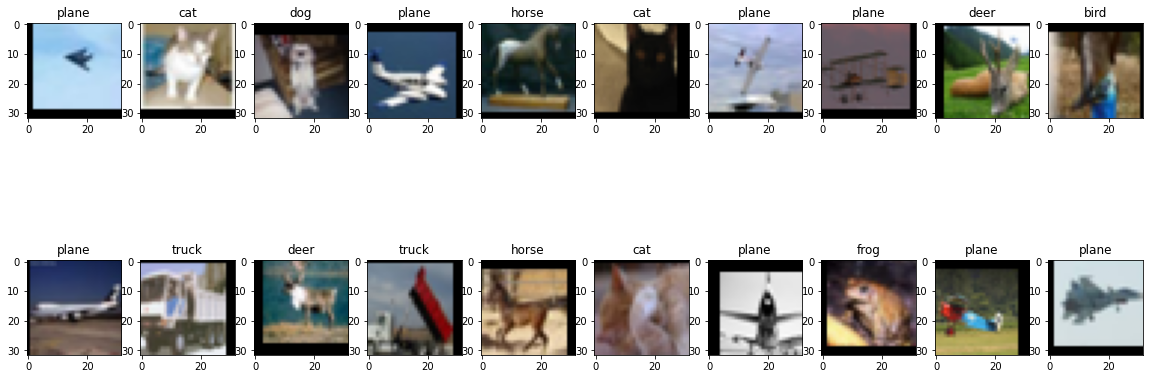

In [9]:
display_imgs(train_loader, classes)

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=ResNet18().to(device)

In [11]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
         Dropout2d-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
         Dropout2d-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
         Dropout2d-9           [-1, 64, 32, 32]               0
       BasicBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
        Dropout2d-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1, 64,

/content/models/resnet.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


In [12]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = OneCycleLR(optimizer,max_lr=0.5,total_steps=30)

for epoch in range(1, 31):
    print(f'Epoch: {epoch} Learning_Rate {scheduler.get_lr()}')
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate [0.020000000000000018]


/content/models/resnet.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=1.7497957944869995 Batch_id=781 Accuracy=26.78: 100%|██████████| 782/782 [01:03<00:00, 12.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.5991, Accuracy: 3999/10000 (39.99%)

Epoch: 2 Learning_Rate [0.03826891219729123]


Loss=1.4090485572814941 Batch_id=781 Accuracy=38.46: 100%|██████████| 782/782 [01:02<00:00, 12.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3965, Accuracy: 4743/10000 (47.43%)

Epoch: 3 Learning_Rate [0.09029437251522865]


Loss=2.2422287464141846 Batch_id=781 Accuracy=44.83: 100%|██████████| 782/782 [01:03<00:00, 12.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2352, Accuracy: 5536/10000 (55.36%)

Epoch: 4 Learning_Rate [0.16815597623237843]


Loss=1.2636520862579346 Batch_id=781 Accuracy=52.18: 100%|██████████| 782/782 [01:03<00:00, 12.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0193, Accuracy: 6319/10000 (63.19%)

Epoch: 5 Learning_Rate [0.26]


Loss=0.9223344326019287 Batch_id=781 Accuracy=58.57: 100%|██████████| 782/782 [01:04<00:00, 12.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9571, Accuracy: 6543/10000 (65.43%)

Epoch: 6 Learning_Rate [0.3518440237676215]


Loss=1.3694469928741455 Batch_id=781 Accuracy=63.50: 100%|██████████| 782/782 [01:03<00:00, 12.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8485, Accuracy: 7049/10000 (70.49%)

Epoch: 7 Learning_Rate [0.42970562748477137]


Loss=1.237634539604187 Batch_id=781 Accuracy=67.60: 100%|██████████| 782/782 [01:03<00:00, 12.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7596, Accuracy: 7281/10000 (72.81%)

Epoch: 8 Learning_Rate [0.4817310878027088]


Loss=0.9579551219940186 Batch_id=781 Accuracy=70.85: 100%|██████████| 782/782 [01:03<00:00, 12.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6762, Accuracy: 7666/10000 (76.66%)

Epoch: 9 Learning_Rate [0.5]


Loss=0.6836200952529907 Batch_id=781 Accuracy=73.63: 100%|██████████| 782/782 [01:02<00:00, 12.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6799, Accuracy: 7784/10000 (77.84%)

Epoch: 10 Learning_Rate [0.49720771772545586]


Loss=0.4163866341114044 Batch_id=781 Accuracy=75.58: 100%|██████████| 782/782 [01:03<00:00, 12.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5806, Accuracy: 8035/10000 (80.35%)

Epoch: 11 Learning_Rate [0.4888932458737294]


Loss=0.600486695766449 Batch_id=781 Accuracy=77.07: 100%|██████████| 782/782 [01:04<00:00, 12.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5561, Accuracy: 8122/10000 (81.22%)

Epoch: 12 Learning_Rate [0.47524231600673683]


Loss=0.26114004850387573 Batch_id=781 Accuracy=78.60: 100%|██████████| 782/782 [01:04<00:00, 12.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5249, Accuracy: 8231/10000 (82.31%)

Epoch: 13 Learning_Rate [0.4565598673402244]


Loss=1.383314847946167 Batch_id=781 Accuracy=79.59: 100%|██████████| 782/782 [01:04<00:00, 12.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5321, Accuracy: 8222/10000 (82.22%)

Epoch: 14 Learning_Rate [0.4332632349055847]


Loss=0.4381158947944641 Batch_id=781 Accuracy=80.72: 100%|██████████| 782/782 [01:04<00:00, 12.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4999, Accuracy: 8316/10000 (83.16%)

Epoch: 15 Learning_Rate [0.40587282697488153]


Loss=0.9981271028518677 Batch_id=781 Accuracy=81.26: 100%|██████████| 782/782 [01:04<00:00, 12.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4522, Accuracy: 8516/10000 (85.16%)

Epoch: 16 Learning_Rate [0.3750005]


Loss=0.38926470279693604 Batch_id=781 Accuracy=82.27: 100%|██████████| 782/782 [01:04<00:00, 12.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4366, Accuracy: 8535/10000 (85.35%)

Epoch: 17 Learning_Rate [0.34133589075057447]


Loss=0.08288237452507019 Batch_id=781 Accuracy=83.35: 100%|██████████| 782/782 [01:04<00:00, 12.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4186, Accuracy: 8611/10000 (86.11%)

Epoch: 18 Learning_Rate [0.30563101096814466]


Loss=0.22759760916233063 Batch_id=781 Accuracy=83.88: 100%|██████████| 782/782 [01:04<00:00, 12.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4740, Accuracy: 8437/10000 (84.37%)

Epoch: 19 Learning_Rate [0.2686834486665125]


Loss=0.4666883051395416 Batch_id=781 Accuracy=84.78: 100%|██████████| 782/782 [01:04<00:00, 12.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3839, Accuracy: 8741/10000 (87.41%)

Epoch: 20 Learning_Rate [0.23131855133348753]


Loss=0.5120459794998169 Batch_id=781 Accuracy=85.57: 100%|██████████| 782/782 [01:03<00:00, 12.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3753, Accuracy: 8785/10000 (87.85%)

Epoch: 21 Learning_Rate [0.19437098903185537]


Loss=0.5304581522941589 Batch_id=781 Accuracy=86.07: 100%|██████████| 782/782 [01:04<00:00, 12.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3573, Accuracy: 8801/10000 (88.01%)

Epoch: 22 Learning_Rate [0.15866610924942562]


Loss=0.40454524755477905 Batch_id=781 Accuracy=86.86: 100%|██████████| 782/782 [01:04<00:00, 12.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3354, Accuracy: 8893/10000 (88.93%)

Epoch: 23 Learning_Rate [0.12500150000000004]


Loss=0.09119826555252075 Batch_id=781 Accuracy=87.47: 100%|██████████| 782/782 [01:03<00:00, 12.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3517, Accuracy: 8871/10000 (88.71%)

Epoch: 24 Learning_Rate [0.09412917302511849]


Loss=0.3038480579853058 Batch_id=781 Accuracy=88.12: 100%|██████████| 782/782 [01:03<00:00, 12.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3291, Accuracy: 8928/10000 (89.28%)

Epoch: 25 Learning_Rate [0.0667387650944153]


Loss=0.2642768621444702 Batch_id=781 Accuracy=88.83: 100%|██████████| 782/782 [01:04<00:00, 12.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3351, Accuracy: 8932/10000 (89.32%)

Epoch: 26 Learning_Rate [0.043442132659775645]


Loss=0.36984577775001526 Batch_id=781 Accuracy=89.41: 100%|██████████| 782/782 [01:04<00:00, 12.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3180, Accuracy: 8976/10000 (89.76%)

Epoch: 27 Learning_Rate [0.024759683993263143]


Loss=0.25458985567092896 Batch_id=781 Accuracy=89.82: 100%|██████████| 782/782 [01:04<00:00, 12.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3072, Accuracy: 9018/10000 (90.18%)

Epoch: 28 Learning_Rate [0.01110875412627059]


Loss=0.17286887764930725 Batch_id=781 Accuracy=90.39: 100%|██████████| 782/782 [01:03<00:00, 12.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3060, Accuracy: 9023/10000 (90.23%)

Epoch: 29 Learning_Rate [0.002794282274544094]


Loss=0.1253829002380371 Batch_id=781 Accuracy=90.52: 100%|██████████| 782/782 [01:03<00:00, 12.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3038, Accuracy: 9023/10000 (90.23%)

Epoch: 30 Learning_Rate [2e-06]


Loss=0.36129921674728394 Batch_id=781 Accuracy=90.48: 100%|██████████| 782/782 [01:03<00:00, 12.23it/s]



Test set: Average loss: 0.3010, Accuracy: 9035/10000 (90.35%)

